In [2]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
%matplotlib inline

In [3]:
latency_7 = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook\\latency_7.csv", error_bad_lines=False, sep=",")
latency_7_2 = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook\\latency_7_2.csv", error_bad_lines=False, sep=",")
latency_5 = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook\\latency_5.csv", error_bad_lines=False, sep=",")
latency_5_2 = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook\\latency_5_2.csv", error_bad_lines=False, sep=",")
latency_3 = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook\\latency_3.csv", error_bad_lines=False, sep=",")
latency_3_1 = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook\\latency_3_1.csv", error_bad_lines=False, sep=",")

In [4]:
latency_7.info

<bound method DataFrame.info of       algorithm     7 nodes
0          RAFT  436.093431
1         Paxos  509.567698
2  No Algorithm  378.346520>

In [5]:
latency_7_2.info

<bound method DataFrame.info of       algorithm  7 nodes (3fails)
0          RAFT        203.498192
1         Paxos        625.339419
2  No Algorithm        691.750815>

In [6]:
latency_5.info

<bound method DataFrame.info of       algorithm     5 nodes
0          RAFT  256.193596
1         Paxos  434.860850
2  No Algorithm  331.635032>

In [7]:
latency_5_2.info

<bound method DataFrame.info of       algorithm  5 nodes (2fails)
0          RAFT        433.054533
1         Paxos       1093.673450
2  No Algorithm        653.685699>

In [8]:
latency_3.info

<bound method DataFrame.info of       algorithm     3 nodes
0          RAFT  605.044012
1         Paxos  409.459693
2  No Algorithm  378.161591>

In [9]:
latency_3_1.info

<bound method DataFrame.info of       algorithm  3 nodes (1fail)
0          RAFT       221.827970
1         Paxos       511.799328
2  No Algorithm       364.197263>

In [27]:
all_7 = pd.merge(latency_7, latency_7_2, how="left", on=["algorithm"])

In [28]:
all_5 = pd.merge(latency_5, latency_5_2, how="left", on=["algorithm"])

In [29]:
all_3 = pd.merge(latency_3, latency_3_1, how="left", on=["algorithm"])

In [30]:
all_7_5 = pd.merge(all_7, all_5, how="left", on=["algorithm"])

In [31]:
all_latency = pd.merge(all_7_5, all_3, how="left", on=["algorithm"])

In [39]:
all_latency.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook\\all_latency.csv', index = False, header=True)

In [32]:
all_latency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   algorithm         3 non-null      object 
 1   7 nodes           3 non-null      float64
 2   7 nodes (3fails)  3 non-null      float64
 3   5 nodes           3 non-null      float64
 4   5 nodes (2fails)  3 non-null      float64
 5   3 nodes           3 non-null      float64
 6   3 nodes (1fail)   3 non-null      float64
dtypes: float64(6), object(1)
memory usage: 192.0+ bytes


In [33]:
all_latency

,algorithm,7 nodes,7 nodes (3fails),5 nodes,5 nodes (2fails),3 nodes,3 nodes (1fail)
0,RAFT,436.093431,203.498192,256.193596,433.054533,605.044012,221.827970
1,Paxos,509.567698,625.339419,434.860850,1093.673450,409.459693,511.799328
2,No Algorithm,378.346520,691.750815,331.635032,653.685699,378.161591,364.197263


In [40]:
all_latency_reversed = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook\\all_latency_reversed.csv", error_bad_lines=False, sep=",")

In [36]:
plt.rcParams['figure.figsize'] = (15.0, 12.0)
plt.rcParams['font.family'] = "serif"

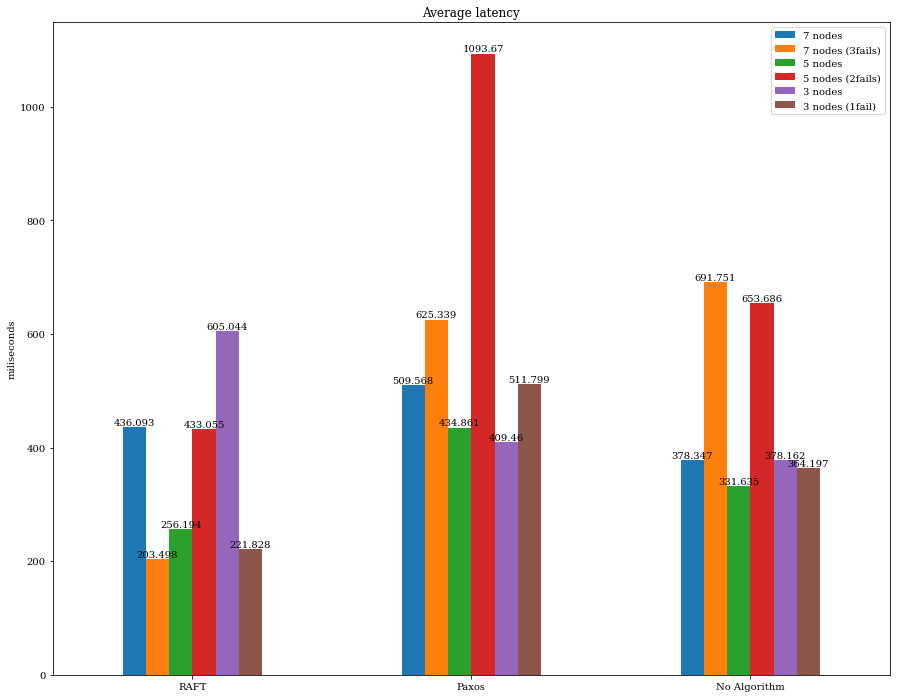

In [38]:
ax = all_latency.plot.bar(x='algorithm')
plt.title('Average latency')
ax.set(xlabel='', ylabel='miliseconds')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc='upper right')
#ax.get_legend().remove()
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\average_latency_all.png', bbox_inches='tight')

In [41]:
all_latency_reversed

,Nodes,RAFT,PAXOS,No Algorithm
0,7 nodes,436.093431,509.567698,378.346520
1,7 nodes (3fails),203.498192,625.339420,691.750815
2,5 nodes,256.193596,434.860850,331.635032
3,5 nodes (2fails),433.054533,1093.673450,653.685699
4,3 nodes,605.044012,409.459693,378.161590
5,3 nodes (1fail),221.827970,511.799328,364.197263


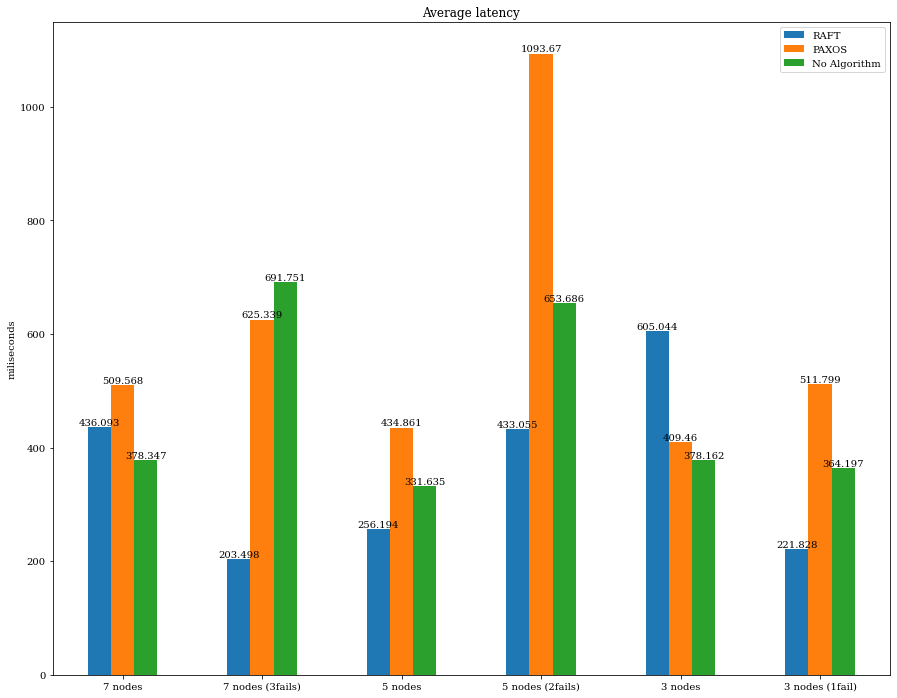

In [43]:
ax = all_latency_reversed.plot.bar(x='Nodes')
plt.title('Average latency')
ax.set(xlabel='', ylabel='miliseconds')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc='upper right')
#ax.get_legend().remove()
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\average_latency_all_nodes.png', bbox_inches='tight')

In [46]:
latency_7_reversed = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook\\latency_7_reversed.csv", error_bad_lines=False, sep=",")

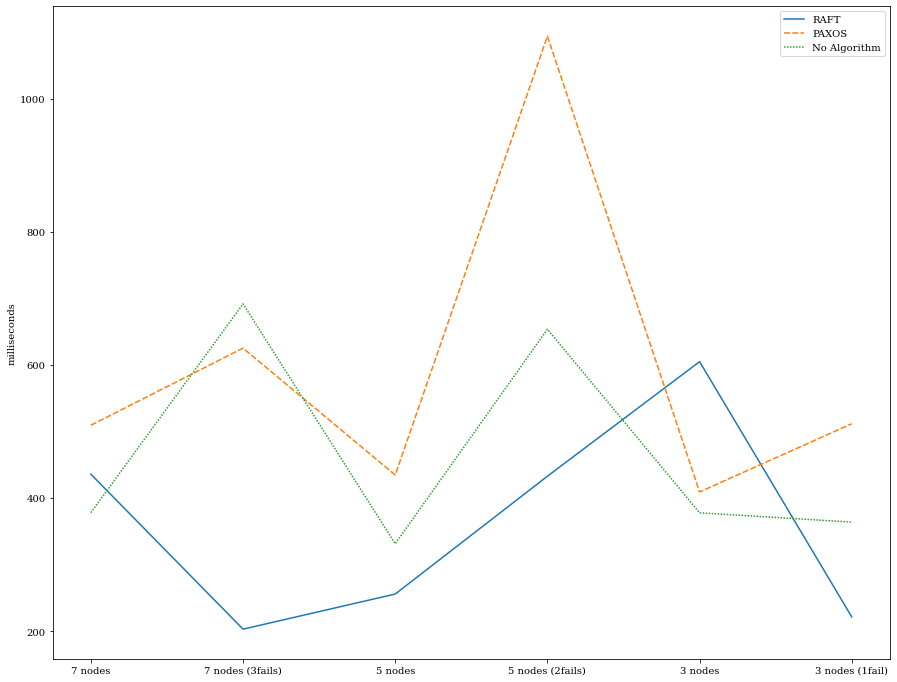

In [65]:
p = sns.lineplot(data = all_latency_reversed)
p.set_ylabel("milliseconds", fontsize = 10)
p.set_xticks(range(len(all_latency_reversed))) # <--- set the ticks first
p.set_xticklabels(['7 nodes','7 nodes (3fails)','5 nodes','5 nodes (2fails)','3 nodes','3 nodes (1fail)'])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\average_latency_all_nodes_lineplot.png', bbox_inches='tight')
plt.show()
